In [43]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


# OHE

In [44]:
dict = {"f1" : ("A", "B", "C", "A", "B"), "f2" : (1, 2, 3, 1, 2), "target" : (0, 1, 0, 0, 1)}
df = pd.DataFrame(dict)
df

,f1,f2,target
0,A,1,0
1,B,2,1
2,C,3,0
3,A,1,0
4,B,2,1


In [3]:
encoder = OneHotEncoder()

encoded_f1 = encoder.fit_transform(df[["f1"]]).toarray()

encoded_f1

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [4]:
encoder = OneHotEncoder()
encoded_f1 = encoder.fit_transform(df[["f1"]]).toarray()

encoded_df = pd.DataFrame(encoded_f1, columns = encoder.get_feature_names_out(["f1"]))
df = pd.concat([df, encoded_df], axis=1)

In [5]:
df

,f1,f2,target,f1_A,f1_B,f1_C
0,A,1,0,1.0,0.0,0.0
1,B,2,1,0.0,1.0,0.0
2,C,3,0,0.0,0.0,1.0
3,A,1,0,1.0,0.0,0.0
4,B,2,1,0.0,1.0,0.0


In [6]:
dict = {"f1" : ("A", "B", "C"), "f2" : (1, 2, 3), "target" : (0, 1, 0)}
yeni = pd.DataFrame(dict)
yeni

,f1,f2,target
0,A,1,0
1,B,2,1
2,C,3,0


In [7]:
encoder.transform(yeni[["f1"]]).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [8]:
encoded_yeni = encoder.transform(yeni[["f1"]]).toarray()

encoded_df = pd.DataFrame(encoded_yeni, columns = encoder.get_feature_names_out(["f1"]))
yeni = pd.concat([yeni, encoded_df], axis=1)
yeni

,f1,f2,target,f1_A,f1_B,f1_C
0,A,1,0,1.0,0.0,0.0
1,B,2,1,0.0,1.0,0.0
2,C,3,0,0.0,0.0,1.0


## parametreler

In [45]:
dict = {"f1" : ("A", "B", "C", "A", "B"), "f2" : (1, 2, 3, 1, 2), "target" : (0, 1, 0, 0, 1)}
df = pd.DataFrame(dict)
df

,f1,f2,target
0,A,1,0
1,B,2,1
2,C,3,0
3,A,1,0
4,B,2,1


In [46]:
encoder = OneHotEncoder(drop = "first")
encoded_f1 = encoder.fit_transform(df[["f1"]]).toarray()

encoded_df = pd.DataFrame(encoded_f1, columns = encoder.get_feature_names_out(["f1"]))
df = pd.concat([df, encoded_df], axis=1)
df

,f1,f2,target,f1_B,f1_C
0,A,1,0,0.0,0.0
1,B,2,1,1.0,0.0
2,C,3,0,0.0,1.0
3,A,1,0,0.0,0.0
4,B,2,1,1.0,0.0


In [47]:
dict = {"f1" : ("A", "B", "D"), "f2" : (1, 2, 3), "target" : (0, 1, 0)}
yeni = pd.DataFrame(dict)
yeni

,f1,f2,target
0,A,1,0
1,B,2,1
2,D,3,0


In [12]:
# encoderi tekrar eğitip sonuca bakalım

In [49]:
dict = {"f1" : ("A", "B", "C", "A", "B"), "f2" : (1, 2, 3, 1, 2), "target" : (0, 1, 0, 0, 1)}
df = pd.DataFrame(dict)
df

,f1,f2,target
0,A,1,0
1,B,2,1
2,C,3,0
3,A,1,0
4,B,2,1


In [50]:
encoder = OneHotEncoder(drop = "first", handle_unknown = "ignore")
encoded_f1 = encoder.fit_transform(df[["f1"]]).toarray()

encoded_df = pd.DataFrame(encoded_f1, columns = encoder.get_feature_names_out(["f1"]))
df = pd.concat([df, encoded_df], axis=1)
df

,f1,f2,target,f1_B,f1_C
0,A,1,0,0.0,0.0
1,B,2,1,1.0,0.0
2,C,3,0,0.0,1.0
3,A,1,0,0.0,0.0
4,B,2,1,1.0,0.0


In [15]:
dict = {"f1" : ("A", "B", "D"), "f2" : (1, 2, 3), "target" : (0, 1, 0)}
yeni = pd.DataFrame(dict)
yeni

,f1,f2,target
0,A,1,0
1,B,2,1
2,D,3,0


In [16]:
encoded_yeni = encoder.transform(yeni[["f1"]]).toarray()

encoded_df = pd.DataFrame(encoded_yeni, columns = encoder.get_feature_names_out(["f1"]))
yeni = pd.concat([yeni, encoded_df], axis=1)
yeni

# 2. indexte D var ve encoderi eğittiğimiz datasetinde D olmamasına rağmen hata vermedi. 

,f1,f2,target,f1_B,f1_C
0,A,1,0,0.0,0.0
1,B,2,1,1.0,0.0
2,D,3,0,0.0,0.0


## OHE vs get_dummies

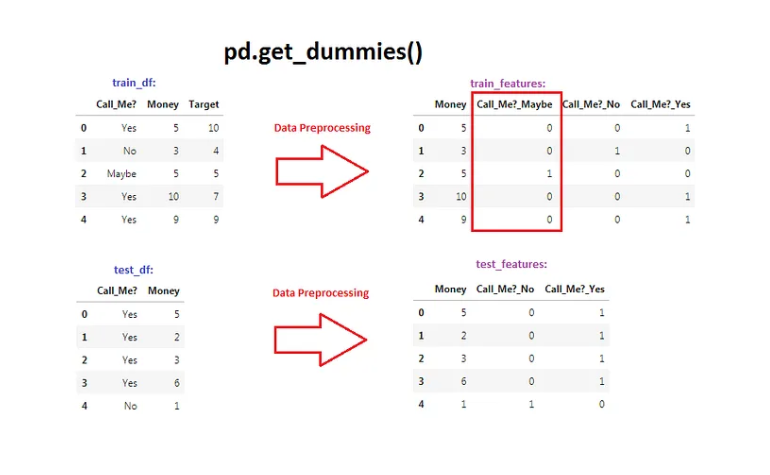

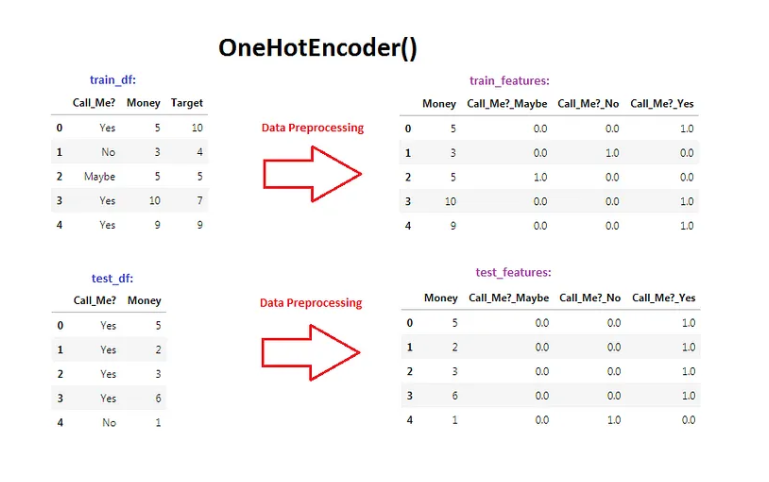

# ordinal encoder vs label encoder

In [61]:
dict = {"f1" : ("A", "B", "C", "A", "B"), "f2" : ("bir", "sıfır", "iki", "iki", "sıfır")}
df = pd.DataFrame(dict)
df

,f1,f2
0,A,bir
1,B,sıfır
2,C,iki
3,A,iki
4,B,sıfır


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      5 non-null      object
 1   f2      5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [63]:
enc = OrdinalEncoder()
transformed_data = enc.fit_transform(df)

transformed_df = pd.DataFrame(transformed_data, columns = df.columns)
transformed_df

,f1,f2
0,0.0,0.0
1,1.0,2.0
2,2.0,1.0
3,0.0,1.0
4,1.0,2.0


In [65]:
enc1 = LabelEncoder()
transformed_f1 = enc1.fit_transform(df.f1)

In [66]:
enc2 = LabelEncoder()
transformed_f2 = enc2.fit_transform(df.f2)

In [67]:
df["f1"] = transformed_f1
df["f2"] = transformed_f2

In [68]:
df
# sonuçlar ordinal ile aynı

,f1,f2
0,0,0
1,1,2
2,2,1
3,0,1
4,1,2


In [69]:
dict = {"f1" : ("A", "B", "C", "A", "B"), "f2" : ("bir", "sıfır", "iki", "iki", "sıfır"), "target" : (0, 1, 0, 0, 1)}
df = pd.DataFrame(dict)
df

,f1,f2,target
0,A,bir,0
1,B,sıfır,1
2,C,iki,0
3,A,iki,0
4,B,sıfır,1


In [70]:
encoder_f1 = OrdinalEncoder(categories = [["A", "B", "C"]])
encoder_f2 = OrdinalEncoder(categories = [["sıfır", "bir", "iki"]])

df["f1"] = encoder_f1.fit_transform(df[["f1"]])
df["f2"] = encoder_f2.fit_transform(df[["f2"]])

df

,f1,f2,target
0,0.0,1.0,0
1,1.0,0.0,1
2,2.0,2.0,0
3,0.0,2.0,0
4,1.0,0.0,1
